In [1]:
import os
import csv
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine
import numpy as np
import pandas as pd
import gensim
from nltk import everygrams
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Word2Vec Model:

In [2]:
model = Word2Vec.load("word2vec_model.model")
print("Model loaded successfully.")

Model loaded successfully.


#### Load CSV:

In [3]:
# Load the CSV file
df_1 = pd.read_csv('/.../filtered_data_in.csv')

# Create a dictionary where each row's first word is the key and the value is the list of all words in that row
words_dict_1 = df_1.apply(lambda row: {row.iloc[0]: row.dropna().tolist()}, axis=1).to_dict()

# Combine all dictionaries into one
dict_1 = {}
for d in words_dict_1.values():
    dict_1.update(d)

In [4]:
# Load the target CSV file
df_2 = pd.read_csv('/.../filtered_data_output.csv')

# Create a dictionary from the new CSV file
words_dict_2 = df_2.apply(lambda row: {row.iloc[0]: row.dropna().tolist()}, axis=1).to_dict()

# Combine all dictionaries into one
dict_2 = {}
for d in words_dict_2.values():
    dict_2.update(d)

#### Relationship Between Two Categories:

In [5]:
# Define a function to calculate the average cosine similarity between two lists of words
def calculate_average_similarity(list1, list2, model):
    valid_scores = []
    for word1 in list1:
        for word2 in list2:
            if word1 in model.wv and word2 in model.wv:
                similarity_score = model.wv.similarity(word1, word2)
                valid_scores.append(similarity_score)
    if valid_scores:
        return np.mean(valid_scores)
    else:
        return 0  # Return 0 if there are no valid similarity scores

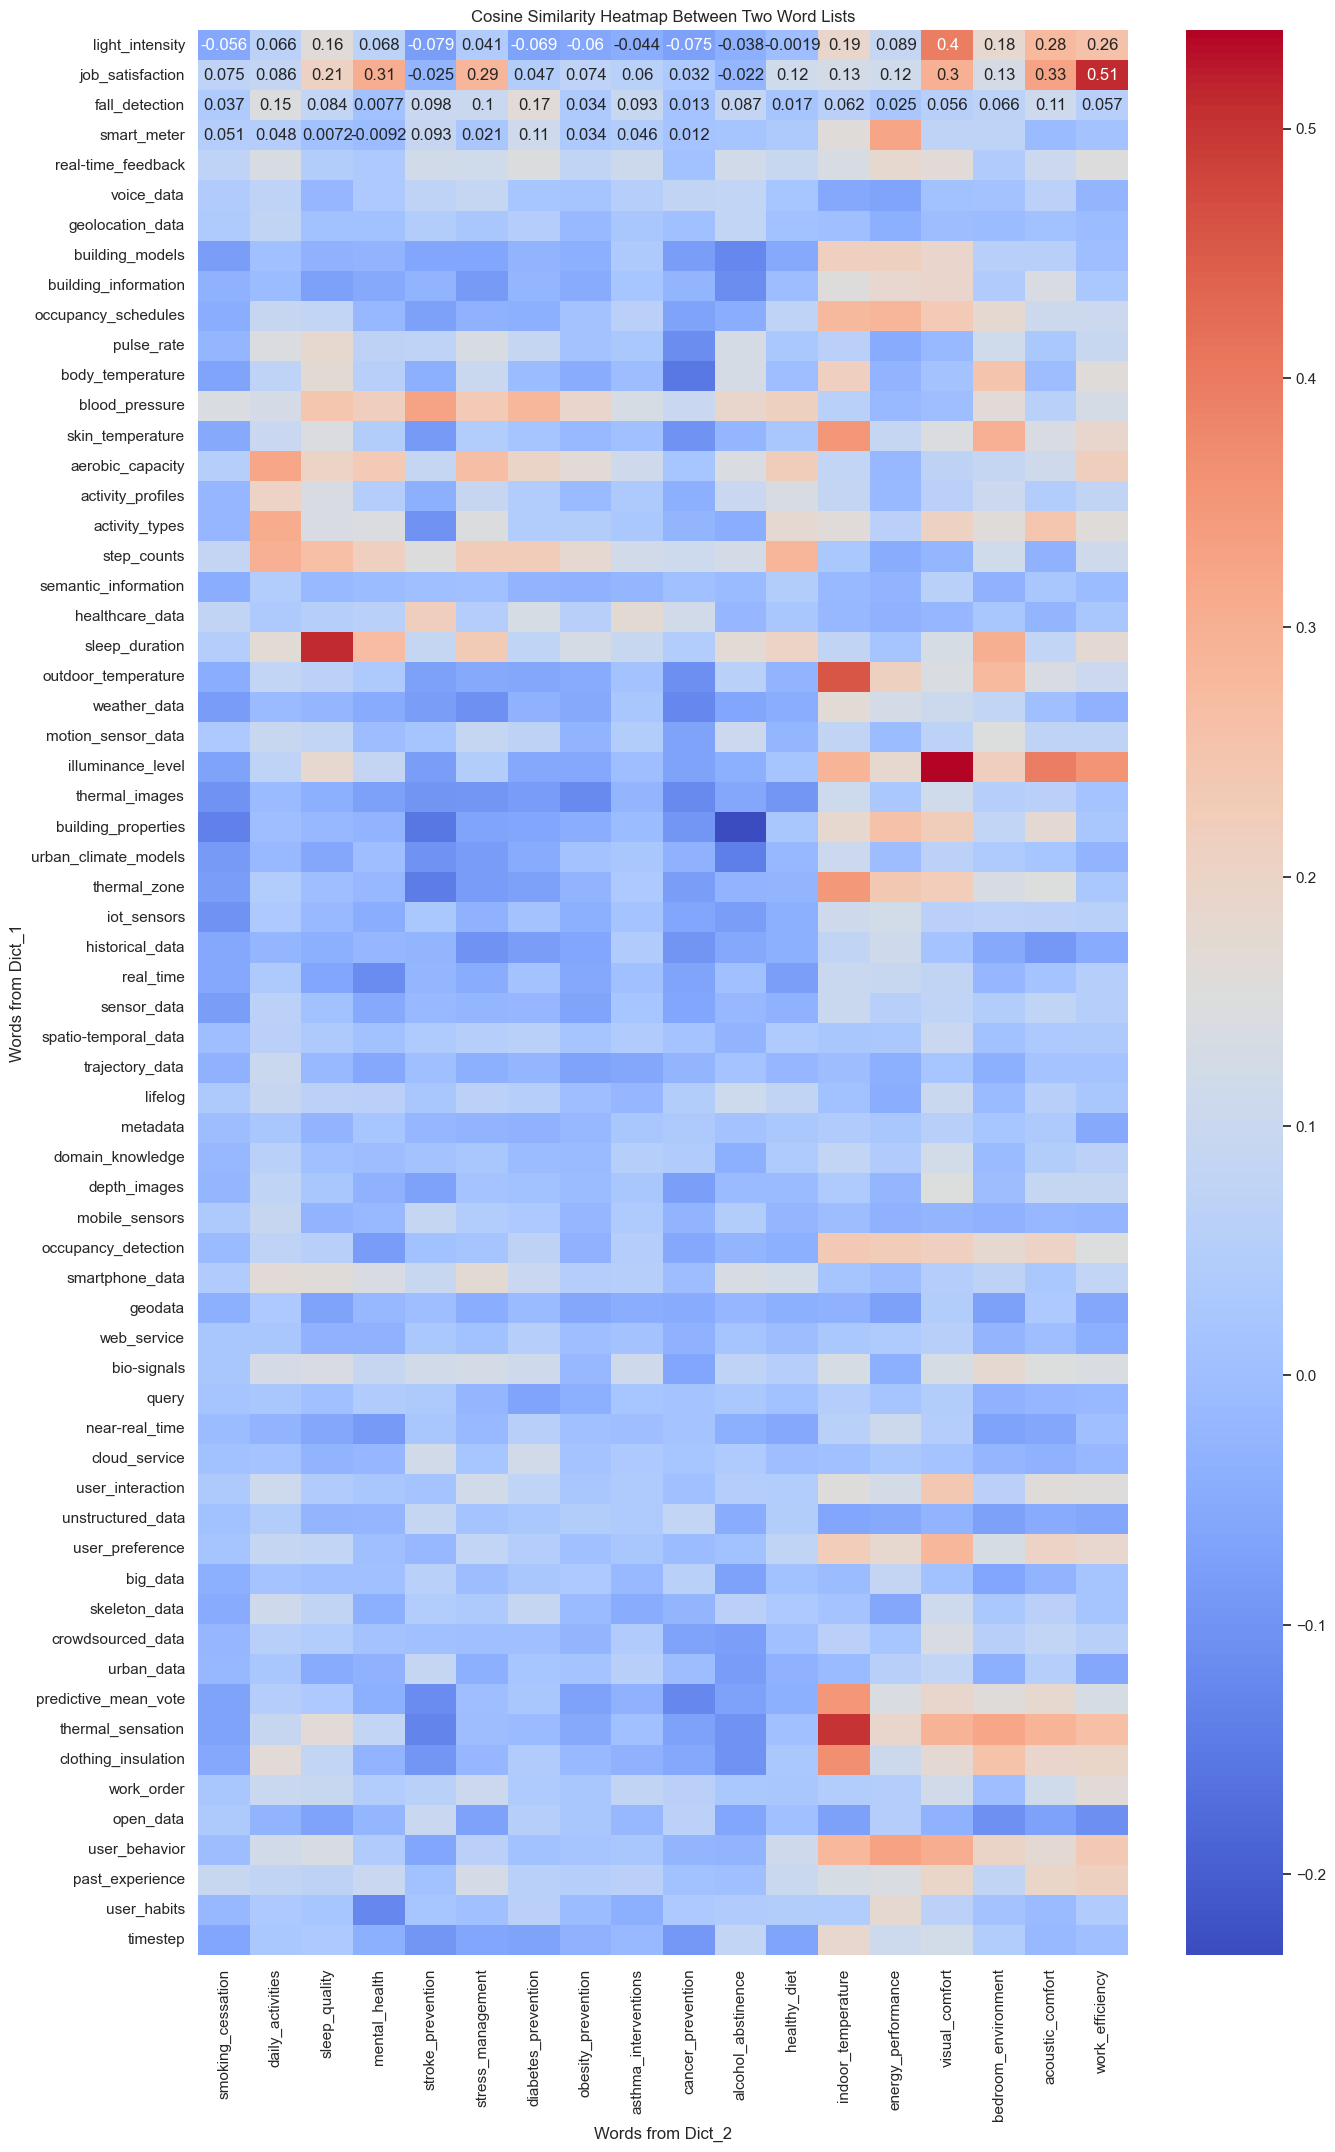

In [6]:
# Initialize an empty similarity matrix
similarity_matrix = np.zeros((len(dict_1), len(dict_2)))

# Calculate the average cosine similarity for each pair of word lists in the dictionaries
for i, (key1, words1) in enumerate(dict_1.items()):
    for j, (key2, words2) in enumerate(dict_2.items()):
        similarity_matrix[i][j] = calculate_average_similarity(words1, words2, model)

# Set labels for the heatmap
labels_1 = list(dict_1.keys())
labels_2 = list(dict_2.keys())

# Plot the heatmap
sns.set(font_scale=1)  # Adjust font size as needed
plt.figure(figsize=(15, 25))
heatmap = sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=labels_2, yticklabels=labels_1)
plt.title('Cosine Similarity Heatmap Between Two Word Lists')
plt.xlabel('Words from Dict_2')
plt.ylabel('Words from Dict_1')
plt.show()


In [7]:
# Define the file save path
save_path = '/.../similarity_matrix/'
if not os.path.exists(save_path):
    os.makedirs(save_path)  # Create directory if it does not exist

#Save heatmap
plt.tight_layout()  # Adjust layout to fit everything
heatmap_figure = heatmap.get_figure()
heatmap_figure.savefig(os.path.join(save_path, 'in_out_similarity_heatmap.png'), dpi=600)
plt.close(heatmap_figure)

# Save the similarity matrix to a CSV file
df_similarity_matrix = pd.DataFrame(similarity_matrix, index=labels_1, columns=labels_2)
csv_file_path = os.path.join(save_path, 'in_out_similarity_matrix.csv')
df_similarity_matrix.to_csv(csv_file_path, index=True, header=True)

print(f"The heatmap and similarity matrix have been saved.")

The heatmap and similarity matrix have been saved.


<Figure size 640x480 with 0 Axes>